<h2>MultipleLinearRegression</h2>

<h3>Importing necessary libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Read Dataset</h3>

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<h3>Take column for prediction</h3>

In [4]:
data = data[['sqft_living','bedrooms','condition','price']]

In [5]:
data


# features = ['sqft_living','bedrooms','condition']
# response = ['price']

,sqft_living,bedrooms,condition,price
0,1180,3,3,221900.0
1,2570,3,3,538000.0
2,770,2,3,180000.0
3,1960,4,5,604000.0
4,1680,3,3,510000.0
...,...,...,...,...
21608,1530,3,3,360000.0
21609,2310,4,3,400000.0
21610,1020,2,3,402101.0
21611,1600,3,3,400000.0


<img src="mulregression.png">

<h3>Data information</h3>

In [6]:
data.describe()

,sqft_living,bedrooms,condition,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,3.370842,3.409430,5.400881e+05
std,918.440897,0.930062,0.650743,3.671272e+05
min,290.000000,0.000000,1.000000,7.500000e+04
25%,1427.000000,3.000000,3.000000,3.219500e+05
50%,1910.000000,3.000000,3.000000,4.500000e+05
75%,2550.000000,4.000000,4.000000,6.450000e+05
max,13540.000000,33.000000,5.000000,7.700000e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  int64  
 1   bedrooms     21613 non-null  int64  
 2   condition    21613 non-null  int64  
 3   price        21613 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 675.5 KB


In [8]:
# count columns and rows
data.shape

(21613, 4)

In [9]:
max(data.condition)

5

<h3> Determine Distribution of individual Columns </h3>

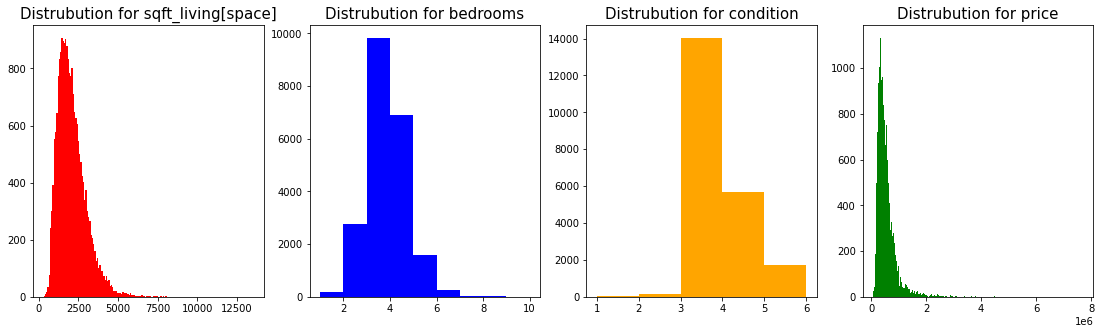

In [10]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(19,5))
# for sqft_living
ax1.hist(data.sqft_living,bins='auto',color='r')
ax1.set_title('Distrubution for sqft_living[space]',fontsize=15)


ax2.hist(data.bedrooms,bins=[1,2,3,4,5,6,7,8,9,10],color='b')
ax2.set_title('Distrubution for bedrooms',fontsize=15)

ax3.hist(data.condition,bins=[1,2,3,4,5,6],color='orange')
ax3.set_title('Distrubution for condition',fontsize=15)

ax4.hist(data.price,bins='auto',color='g')
ax4.set_title('Distrubution for price',fontsize=15)




plt.show()

<h3> Determine Distribution of three columns </h3>

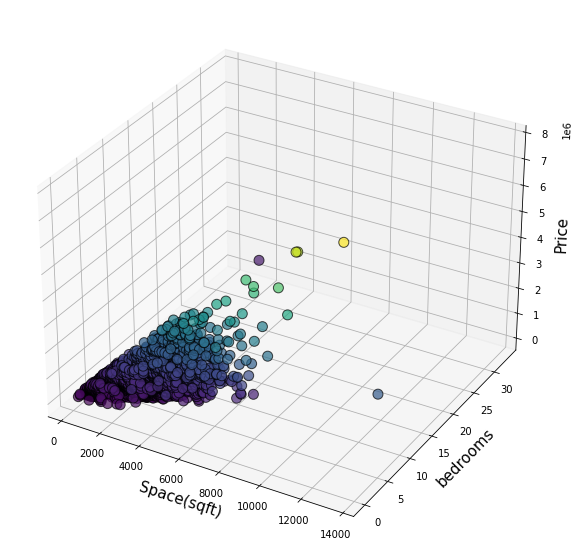

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.sqft_living,data.bedrooms,data.price,c=data.price,linewidths=1, alpha=.7,edgecolor='k',s = 100)
ax.set_xlabel('Space(sqft)',fontdict={'fontsize':15})
ax.set_ylabel('bedrooms',fontdict={'fontsize':15})
ax.set_zlabel('Price',fontdict={'fontsize':15})


plt.show()

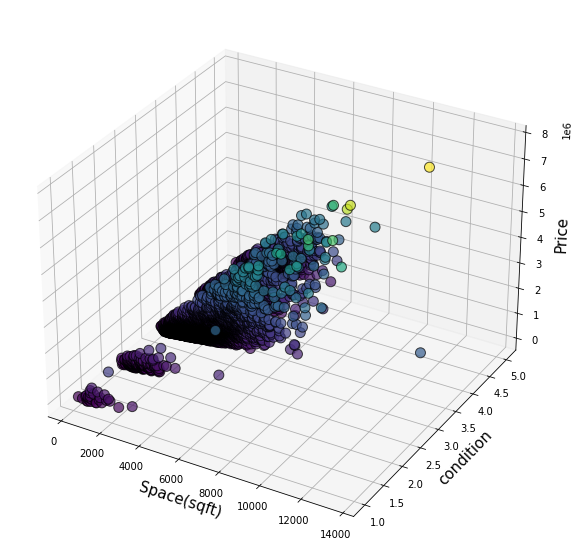

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.sqft_living,data.condition,data.price,c=data.price,linewidths=1, alpha=.7,edgecolor='k',s = 100)
ax.set_xlabel('Space(sqft)',fontdict={'fontsize':15})
ax.set_ylabel('condition',fontdict={'fontsize':15})
ax.set_zlabel('Price',fontdict={'fontsize':15})

plt.show()

<h3> Import ML libraries</h3>

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

<h3>Split featues and response </h3>

In [14]:
features = data[['sqft_living','bedrooms','condition']]
response = data.price

In [15]:
x_train,x_test,y_train,y_test = train_test_split(features,response,test_size=0.2,random_state=0)

In [16]:
reg_model = LinearRegression(fit_intercept=True,normalize=True)

In [17]:
reg_model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [18]:
reg_model.predict(x_test)

array([ 393994.07247793, 1366701.64957418,  397204.83165568, ...,
        312243.40975582,  180602.28346793,  402144.66673292])

In [19]:
reg_model.coef_

array([   321.07591778, -59275.34847783,  50972.30045978])

In [20]:
reg_model.intercept_

-99510.69436450594

In [21]:
reg_model.predict([[1000,2,5]])

array([357876.02875409])

In [22]:
reg_model.score(x_test,y_test)*100

50.17940529242103

In [23]:
r2_score(y_test,reg_model.predict(x_test))*100

50.17940529242103

In [24]:
mean_squared_error(y_test,reg_model.predict(x_test))

59248778215.233116

In [25]:
mean_absolute_error(y_test,reg_model.predict(x_test))

166232.3801589835

In [38]:
import statsmodels.api as sm
new_x = sm.add_constant(x_train)
model = sm.OLS(y_train,new_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6162.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        23:33:29   Log-Likelihood:            -2.4004e+05
No. Observations:               17290   AIC:                         4.801e+05
Df Residuals:                   17286   BIC:                         4.801e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.951e+04   1.26e+04     -7.921      0.000   -1.24e+05   -7.49e+04
sqft_living   321.0759      2.626    122.281      0.000     315.929     326.223
bedrooms    -5.928e+04   2567.013    -23.091      0.000   -6.43e+04   -5.42e+04
condition    5.097e+04   3042.290     16.755      0.000     4.5e+04    5.69e+04
==============================================================================
Omnibus:                    11709.940   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428790.707
Skew:                           2.767   Prob(JB):                         0.00
Kurtosis:                      26.761   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model.params

const         -99510.694365
sqft_living      321.075918
bedrooms      -59275.348478
condition      50972.300460
dtype: float64

In [48]:
print('R-squared value = {:.2f}%'.format(reg_model.score(x_test,y_test)*100))
print('Mean squared error ={:.2f}'.format(mean_squared_error(y_test,reg_model.predict(x_test))))
print('Mean absolute error = {:.2f}'.format(mean_absolute_error(y_test,reg_model.predict(x_test))))

R-squared value = 50.18%
Mean squared error =59248778215.23
Mean absolute error = 166232.38


<h3>Final ans</h3>

In [61]:
print('Price = ({:.2f}) * sqft_living + ({:.2f}) * bedrooms + ({:.2f}) * condition + {:.2f} '.format(reg_model.coef_[0],reg_model.coef_[1],reg_model.coef_[2],reg_model.intercept_))

Price = (321.08) * sqft_living + (-59275.35) * bedrooms + (50972.30) * condition + -99510.69 
